# Logistic Map
In this notebook, we'll explore polynomial mapping and visulize chaotic behavious arising from very simple non-linear dynamical equations.

## At the end of this notebook, you'll be able to:
* Understand what is a logisitic map.
* Visualize the effects of parameters and inital values on the behavior of an ecological system described by the logistic map.
* Observe chaos generated from a simple non linear equation.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


## Defining Logistic Map
Mathematically, the logistic map is written as:<br>
**$x_{t+1} = r x_t (1 - x_t)$**

where, <br>
**$x_t$** is a number between zero and one, that represents the ratio of existing population to the maximum possible population at time-step **$t$** <br>
**r** is a paramter that can be tuned. Range of interest $[0,4]$.


We will be defining two functions, **logisitic_map** and **logistic_map_time**. <br>
**logisitic_map** will return the next state, given the current state and **$r$**. <br>
**logistic_map_time** will return the evolution of the states over a period of time given an initial state and **$r$**.

In [4]:
def logistic_map(x,r):
    ''' This function returns the population size variable x in the next time-step (t+1) as a function of x(t) and the parameter r '''
    return r*x*(1-x)

def logistic_map_time(x0,r,T=1000):
    ''' This function returns the population size variable x entire time-series, from t=0 to t=T-1, as a function of the initial condition x(0) and the parameter r '''
    x_t    = np.zeros(T)
    x_t[0] = x0
    for t in range(T-1):
        x_t[t+1] = logistic_map(x_t[t],r)
    return x_t

## Visualizing Chaos

### Part 1: Small change in initial condition, large change in output
Now, we have our logistic map, let's plot some graphs to see how different values of **$r$** (especially beyond $3.5$) can lead to a larger change in the population over time for very small changes in initial conditions.

Let's take two **$r$** values, **$r_0 = 3.2$** and **$r_1 = 3.6$**. Also, take two _very close_ inital conditions **$x_0 = 0.4444$** and **$x_1 = 0.4443$**. Calculate the logistic maps over time ($T = 100$) for the intial condition **$x_0$** and **$x_1$** with **$r_0$** as parameter. Similarly calculate with **$r_1$** as parameter and plot 2 graphs with **time** on **x-axis** and **$x_t$** for the two different initial conditions on **y-axis**. Also, plot the difference between the **$x_t$** for the two inital conditions.

### Part 2: The Cobweb Diagram
The cobweb diagram gives us information on how the initial condition evolves over time. Let's first plot for different **$x_0$** values between 0 and 1, their corresponding **$x_1$** values. Plot **$x_0$** on **x-axis** and **$x_1$** on **y-axis** for **$r_0$** and **$r_1$** separately. Also, plot **$x_0$** vs **$x_0$** (straight line) on the individual graphs for reference. We have already calculated for **Part 1** the logistic maps over time for **$x_0, r_0$** and **$x_0, r_1$**, so lets use this, to see how the population evolves over time for the same intial condition but different **$r$** values. On the same graph, plot the **$x_t$** values on the **x-axis** and their corresponding **$x_{t+1}$** values on the **y-axis** for both the **$r$** values.

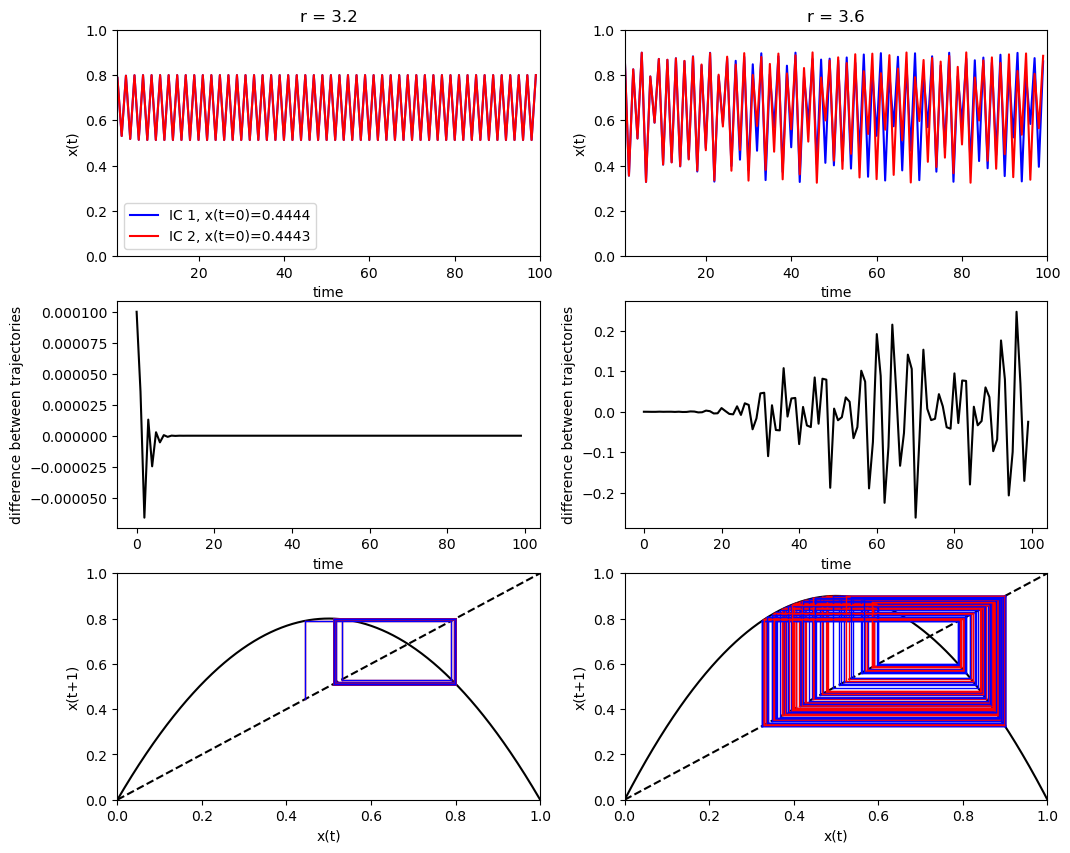

In [3]:
T = 100
x_array = np.linspace(0,1,1000)

x0_0   = 0.4444
x0_1   = 0.4443

r_0 = 3.2
r_1 = 3.6

x_t_IC0_r0 = logistic_map_time(x0_0,r_0,T) # IC 0, param 0
x_t_IC1_r0 = logistic_map_time(x0_1,r_0,T) # IC 1, param 0
x_t_IC0_r1 = logistic_map_time(x0_0,r_1,T) # IC 0, param 1
x_t_IC1_r1 = logistic_map_time(x0_1,r_1,T) # IC 1, param 1


fig, ax  = plt.subplots(3,2,figsize=(12,10))
ax[0,0].plot(x_t_IC0_r0,'-b')
ax[0,0].plot(x_t_IC1_r0,'-r')
ax[0,1].plot(x_t_IC0_r1,'-b')
ax[0,1].plot(x_t_IC1_r1,'-r')

ax[1,0].plot(x_t_IC0_r0-x_t_IC1_r0,color='black')
ax[1,1].plot(x_t_IC0_r1-x_t_IC1_r1,color='black')

ax[2,0].plot(x_array,r_0*x_array*(1-x_array),color='black')
ax[2,0].plot(x_array,x_array,'--',color='black')
for t in range(T-1):
    ax[2,0].plot([x_t_IC0_r0[t],x_t_IC0_r0[t]  ],[x_t_IC0_r0[t]  ,x_t_IC0_r0[t+1]],'-r',linewidth=1) # vertical   step
    ax[2,0].plot([x_t_IC0_r0[t],x_t_IC0_r0[t+1]],[x_t_IC0_r0[t+1],x_t_IC0_r0[t+1]],'-r',linewidth=1) # horizontal step
    ax[2,0].plot([x_t_IC1_r0[t],x_t_IC1_r0[t]  ],[x_t_IC1_r0[t]  ,x_t_IC1_r0[t+1]],'-b',linewidth=1) # vertical   step
    ax[2,0].plot([x_t_IC1_r0[t],x_t_IC1_r0[t+1]],[x_t_IC1_r0[t+1],x_t_IC1_r0[t+1]],'-b',linewidth=1) # horizontal step
    
ax[2,1].plot(x_array,r_1*x_array*(1-x_array),color='black')
ax[2,1].plot(x_array,x_array,'--',color='black')
for t in range(T-1):
    ax[2,1].plot([x_t_IC0_r1[t],x_t_IC0_r1[t]  ],[x_t_IC0_r1[t]  ,x_t_IC0_r1[t+1]],'-r',linewidth=1) # vertical   step
    ax[2,1].plot([x_t_IC0_r1[t],x_t_IC0_r1[t+1]],[x_t_IC0_r1[t+1],x_t_IC0_r1[t+1]],'-r',linewidth=1) # horizontal step
    ax[2,1].plot([x_t_IC1_r1[t],x_t_IC1_r1[t]  ],[x_t_IC1_r1[t]  ,x_t_IC1_r1[t+1]],'-b',linewidth=1) # vertical   step
    ax[2,1].plot([x_t_IC1_r1[t],x_t_IC1_r1[t+1]],[x_t_IC1_r1[t+1],x_t_IC1_r1[t+1]],'-b',linewidth=1) # horizontal step


ax[0,0].set_xlim((1,T))
ax[0,0].set_ylim((0,1))
ax[0,1].set_xlim((1,T))
ax[0,1].set_ylim((0,1))
ax[2,0].set_xlim((0,1))
ax[2,0].set_ylim((0,1))
ax[2,1].set_xlim((0,1))
ax[2,1].set_ylim((0,1))

ax[0,0].set_xlabel('time')
ax[0,1].set_xlabel('time')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')

ax[0,0].set_ylabel('x(t)')
ax[0,1].set_ylabel('x(t)')
ax[1,0].set_ylabel('difference between trajectories')
ax[1,1].set_ylabel('difference between trajectories')

ax[0,0].legend(['IC 1, x(t=0)=0.4444','IC 2, x(t=0)=0.4443'])
ax[0,0].set_title('r = '+str(r_0))
ax[0,1].set_title('r = '+str(r_1))

ax[2,0].set_xlabel('x(t)')
ax[2,1].set_xlabel('x(t)')
ax[2,0].set_ylabel('x(t+1)')
ax[2,1].set_ylabel('x(t+1)')


plt.show()

In [60]:
T = 100
x_array = np.linspace(0,1,1000)

x0_0   = 0.4444
x0_1   = 0.4443

r_0 = 3.2
r_1 = 3.6

x_t_IC0_r0 = logistic_map_time(x0_0,r_0,T) # IC 0, param 0
x_t_IC1_r0 = logistic_map_time(x0_1,r_0,T) # IC 1, param 0
x_t_IC0_r1 = logistic_map_time(x0_0,r_1,T) # IC 0, param 1
x_t_IC1_r1 = logistic_map_time(x0_1,r_1,T) # IC 1, param 1


cobbweb_IC0_r0 = np.zeros(2*T)
cobbweb_IC0_r0[0:(2*T):2] = x_t_IC0_r0
cobbweb_IC0_r0[1:(2*T):2] = x_t_IC0_r0

cobbweb_IC1_r0 = np.zeros(2*T)
cobbweb_IC1_r0[0:(2*T):2] = x_t_IC1_r0
cobbweb_IC1_r0[1:(2*T):2] = x_t_IC1_r0

cobbweb_IC0_r1 = np.zeros(2*T)
cobbweb_IC0_r1[0:(2*T):2] = x_t_IC0_r1
cobbweb_IC0_r1[1:(2*T):2] = x_t_IC0_r1

cobbweb_IC1_r1 = np.zeros(2*T)
cobbweb_IC1_r1[0:(2*T):2] = x_t_IC1_r1
cobbweb_IC1_r1[1:(2*T):2] = x_t_IC1_r1

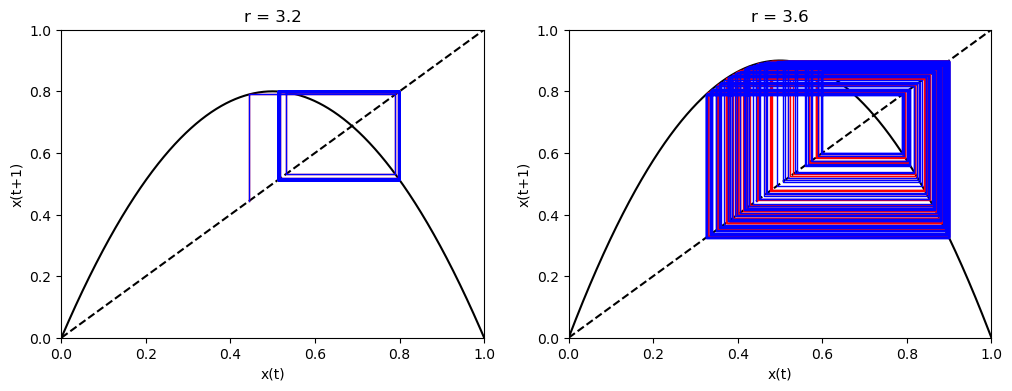

In [63]:
fig, ax  = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('r = '+str(r_0))
ax[1].set_title('r = '+str(r_1))

ax[0].plot(x_array,r_0*x_array*(1-x_array),color='black')
ax[0].plot(x_array,x_array,'--',color='black')

ax[1].plot(x_array,r_1*x_array*(1-x_array),color='black')
ax[1].plot(x_array,x_array,'--',color='black')

ax[0].set_xlim((0,1))
ax[0].set_ylim((0,1))
ax[1].set_xlim((0,1))
ax[1].set_ylim((0,1))

ax[0].set_xlabel('x(t)')
ax[1].set_xlabel('x(t)')
ax[0].set_ylabel('x(t+1)')
ax[1].set_ylabel('x(t+1)')

ax[0].plot(cobbweb_IC0_r0[:-1],cobbweb_IC0_r0[1:],'-r',linewidth=1) # vertical   step

ax[0].plot(cobbweb_IC1_r0[:-1],cobbweb_IC1_r0[1:],'-b',linewidth=1) # vertical   step

ax[1].plot(cobbweb_IC0_r1[:-1],cobbweb_IC0_r1[1:],'-r',linewidth=1) # vertical   step

ax[1].plot(cobbweb_IC1_r1[:-1],cobbweb_IC1_r1[1:],'-b',linewidth=1) # vertical   step

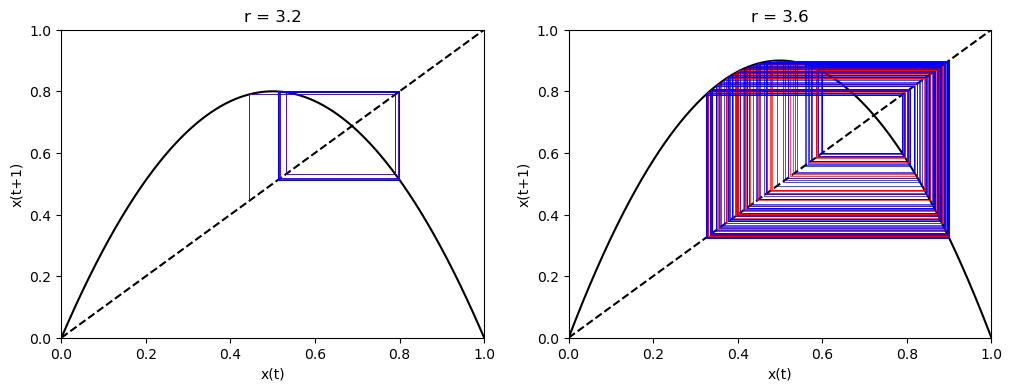

In [64]:
fig, ax  = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('r = '+str(r_0))
ax[1].set_title('r = '+str(r_1))

ax[0].plot(x_array,r_0*x_array*(1-x_array),color='black')
ax[0].plot(x_array,x_array,'--',color='black')

ax[1].plot(x_array,r_1*x_array*(1-x_array),color='black')
ax[1].plot(x_array,x_array,'--',color='black')

ax[0].set_xlim((0,1))
ax[0].set_ylim((0,1))
ax[1].set_xlim((0,1))
ax[1].set_ylim((0,1))

ax[0].set_xlabel('x(t)')
ax[1].set_xlabel('x(t)')
ax[0].set_ylabel('x(t+1)')
ax[1].set_ylabel('x(t+1)')

line_IC0_r0 = ax[0].plot(cobbweb_IC0_r0[0], cobbweb_IC0_r0[1],'-r',linewidth=0.5)[0]
line_IC1_r0 = ax[0].plot(cobbweb_IC1_r0[0], cobbweb_IC1_r0[1],'-b',linewidth=0.5)[0]
line_IC0_r1 = ax[1].plot(cobbweb_IC0_r1[0], cobbweb_IC0_r1[1],'-r',linewidth=0.5)[0]
line_IC1_r1 = ax[1].plot(cobbweb_IC1_r1[0], cobbweb_IC1_r1[1],'-b',linewidth=0.5)[0]

def update(frame):
    line_IC0_r0.set_xdata(cobbweb_IC0_r0[0:frame])
    line_IC0_r0.set_ydata(cobbweb_IC0_r0[1:(frame+1)])

    line_IC1_r0.set_xdata(cobbweb_IC1_r0[0:frame])
    line_IC1_r0.set_ydata(cobbweb_IC1_r0[1:(frame+1)])

    line_IC0_r1.set_xdata(cobbweb_IC0_r1[0:frame])
    line_IC0_r1.set_ydata(cobbweb_IC0_r1[1:(frame+1)])

    line_IC1_r1.set_xdata(cobbweb_IC1_r1[0:frame])
    line_IC1_r1.set_ydata(cobbweb_IC1_r1[1:(frame+1)])

    return line_IC0_r0, line_IC1_r0, line_IC0_r1, line_IC1_r1

ani = animation.FuncAnimation(fig=fig, func=update, frames=2*T, interval=100)
ani.save(filename="cobbweb_v1.gif", writer="pillow")
plt.show()

## Visualizing the effect of Initial Conditions
In the above cell we have seen that slight change in initial condition leads to a large change in ouput when **$r$** is greater than some value. Now lets see the effect of different initial conditions on the population. Plot the logistic map over time ($T = 20$) for different initial conditions and two different **$r$** values **$r_0 = 2.5$** and **$r_1 = 3.5$**.

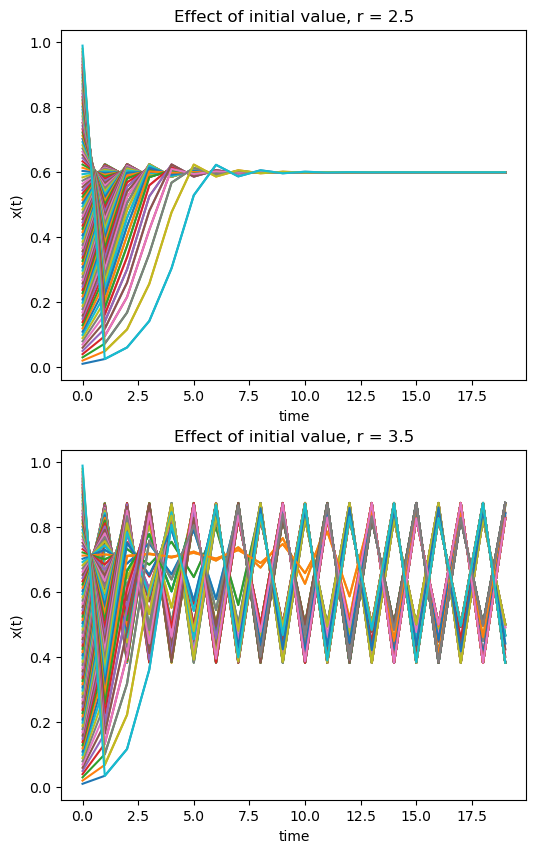

In [4]:
T = 20
x_array = np.linspace(0.01,0.99,100)

r_0 = 2.5
r_1 = 3.5

fig, ax  = plt.subplots(2,1,figsize=(6,10))

for x_0 in x_array:
    x_t1 = logistic_map_time(x_0,r_0,T)
    x_t2 = logistic_map_time(x_0,r_1,T)
    ax[0].plot(x_t1)
    ax[1].plot(x_t2)

ax[0].set_title("Effect of initial value, r = " + str(r_0))
ax[0].set_xlabel('time')
ax[0].set_ylabel('x(t)')
ax[1].set_title("Effect of initial value, r = " + str(r_1))
ax[1].set_xlabel('time')
ax[1].set_ylabel('x(t)')
plt.show()

# Visualizing the effect of the parameter **$r$**
Now we have seen that the initial condition doesn't affect the population over time, let's see how the population changes with different **r** values. Plot the logistic map over time ($T = 30$) with initial condition as 0.2 for different **$r$** values.

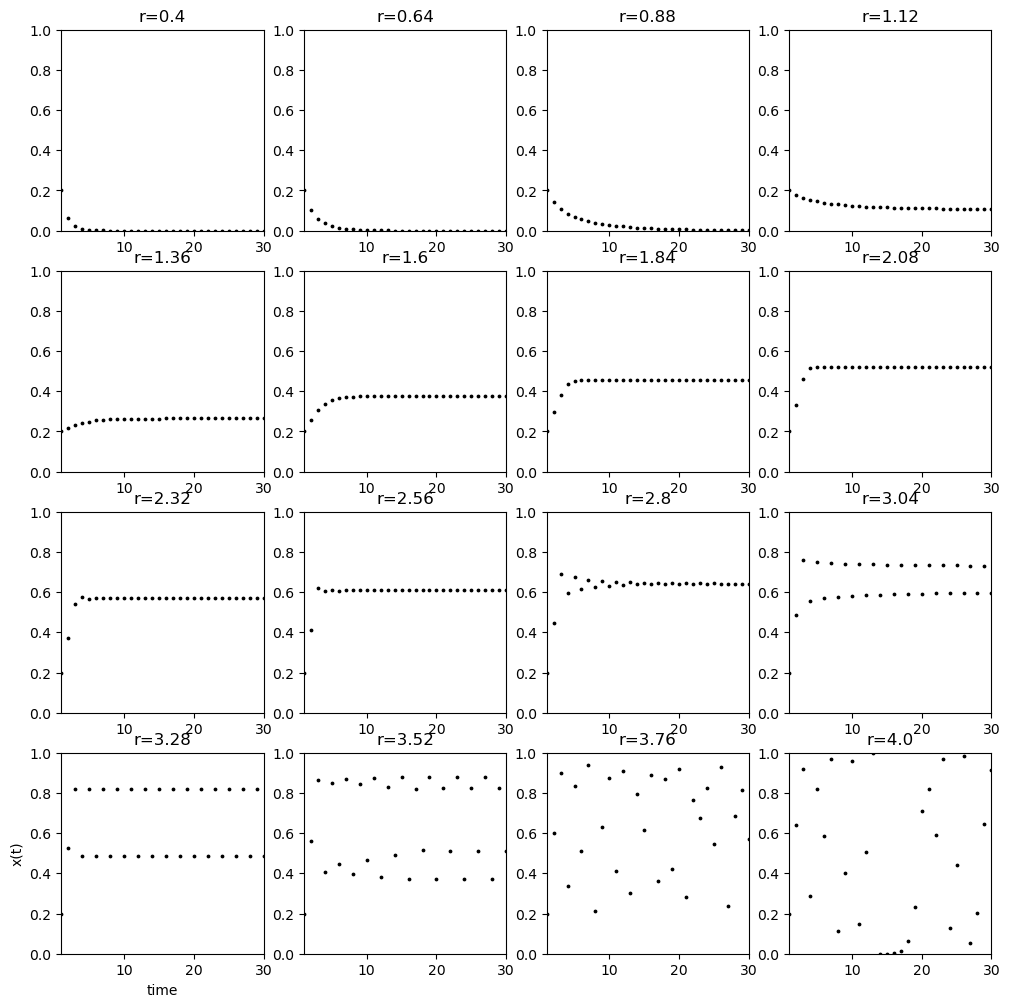

In [5]:
T        = 30

n_r_plot = 16
r_array  = np.linspace(0.4,4,n_r_plot)

fig, ax  = plt.subplots(4,4,figsize=(12,12))
ax = ax.flatten()
for i_r in range(n_r_plot):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    ax[i_r].scatter(np.linspace(1,T,T),x_t,s=3,c='black')
    ax[i_r].set_title('r=' + str(round(r_array[i_r],2)))
    ax[i_r].set_ylim((0,1))
    ax[i_r].set_xlim((1,T))
    
    if i_r == 12:
        ax[i_r].set_xlabel('time')
        ax[i_r].set_ylabel('x(t)')
    
plt.show()

## Plotting the Bifurcation Diagram (Period Doubling)
From the above plots, we know that the paramter **r** affects the population dynamics and the sensitivity to the initial condition. Now let's plot the population after it has "stabilized" for different values of **$r$**. Compute the logistic map over time ($T = 1000$) for initial condition of 0.2 and different values of **$r$**. Let's take the population (**$x_t$**) after time 500 so that it would be stabilized. Plot the **$r$** values on **x-axis** and **$x_t$** on **y-axis**.

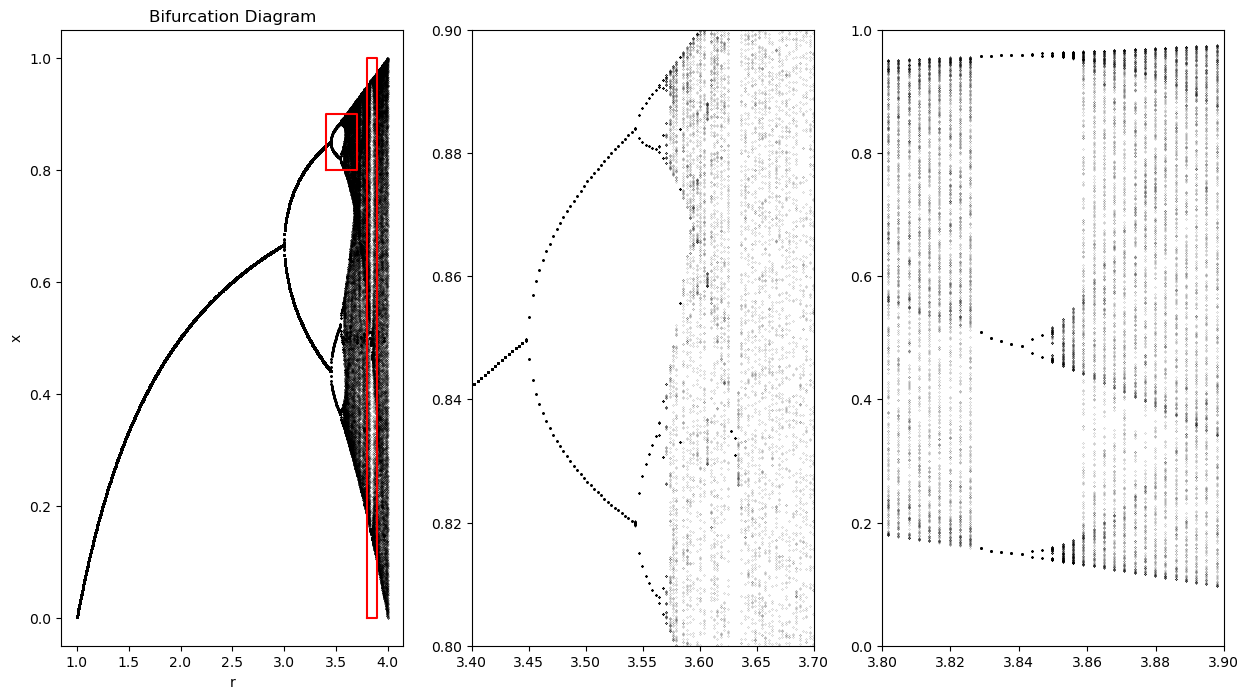

In [9]:
T        = 1000
T_start  = 500

n_r      = 1000
r_array  = np.linspace(1,4,n_r)

fig,ax = plt.subplots(1,3,figsize=(15,8))
for i_r in range(n_r):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    x_t = x_t[T_start:T:1]
    ax[0].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')
    ax[1].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')
    ax[2].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')

ax[0].set_xlabel('r')
ax[0].set_ylabel('x')
ax[0].set_title('Bifurcation Diagram')


xlim_1 = np.array([3.4,3.7])
ylim_1 = np.array([0.8,0.9])

xlim_1_box = xlim_1[[0,0,1,1,0]]
ylim_1_box = ylim_1[[0,1,1,0,0]]

xlim_2 = np.array([3.8,3.9])
ylim_2 = np.array([0.0,1.0])

xlim_2_box = xlim_2[[0,0,1,1,0]]
ylim_2_box = ylim_2[[0,1,1,0,0]]

ax[1].set_xlim(xlim_1)
ax[1].set_ylim(ylim_1)
ax[0].plot(xlim_1_box,ylim_1_box,'-r')
            
ax[2].set_xlim(xlim_2)
ax[2].set_ylim(ylim_2)
ax[0].plot(xlim_2_box,ylim_2_box,'-r')


plt.show()


## Plotting the Return Map
For different r values, we have seen that $x_t$ might not settle at one value but might osciallate between multiple values. Let's plot a graph that shows the number of values **$x_t$** visits for different **$r$** values.

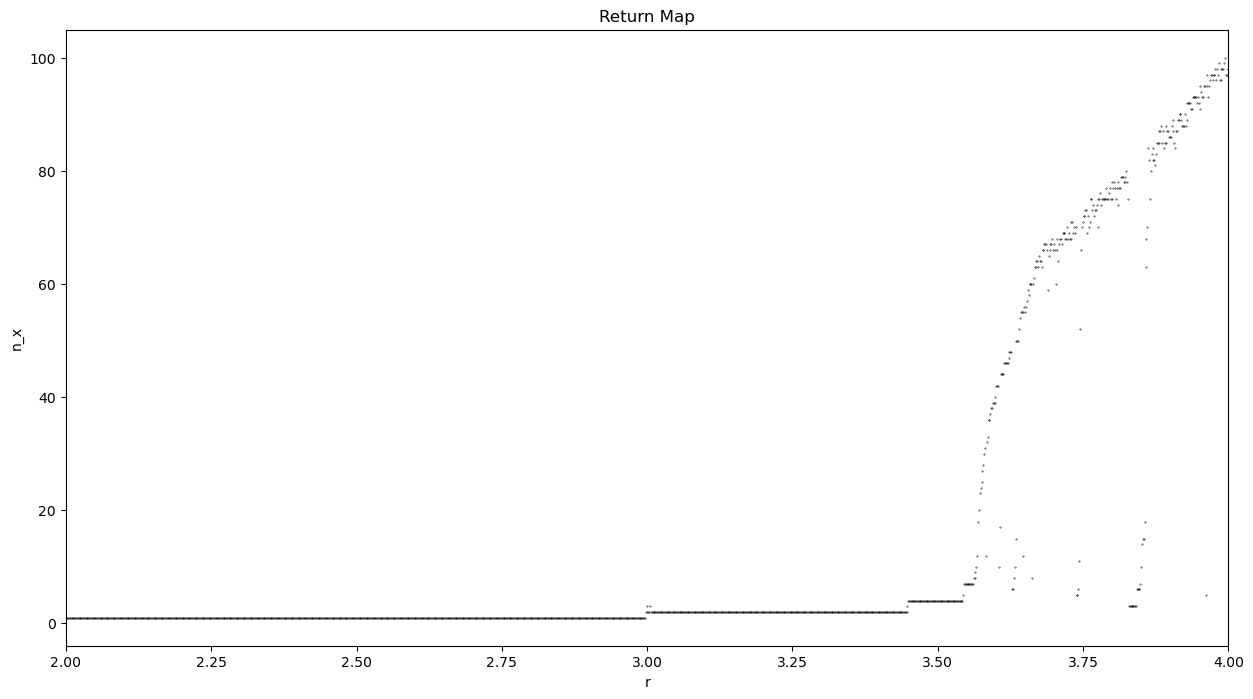

In [10]:
T        = 1000
T_start  = 500

n_r      = 2000
r_array  = np.linspace(1,4,n_r)

fig,ax = plt.subplots(1,1,figsize=(15,8))
for i_r in range(n_r):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    x_t = x_t[T_start:T:1]
    n_visited = len(np.unique(np.round(x_t - 0.005,2)))
    ax.scatter(r_array[i_r],n_visited,s=0.1,c='black')

ax.set_title('Return Map')
ax.set_xlim(2,4)
ax.set_xlabel('r')
ax.set_ylabel('n_x')
              
plt.show()

## References
* https://en.wikipedia.org/wiki/Logistic_map
* May, Robert M. (1976). "Simple mathematical models with very complicated dynamics". Nature. 261 (5560): 459–467. Bibcode:1976Natur.261..459M. Paper: [Link](https://www.nature.com/articles/261459a0)